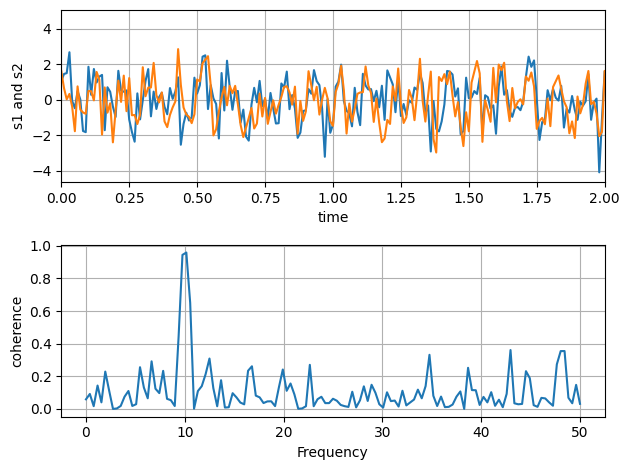

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()

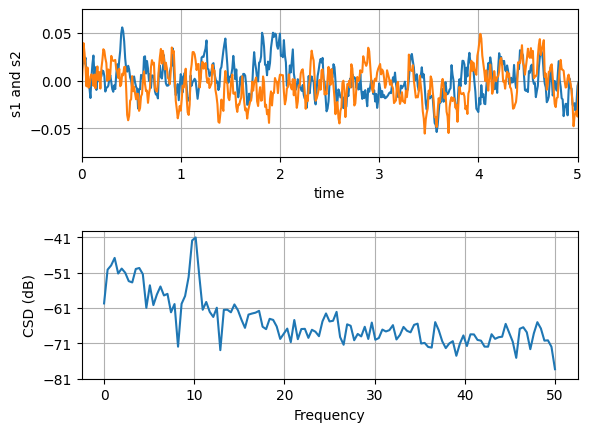

In [2]:
import numpy as np
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

dt = 0.01
t = np.arange(0, 30, dt)

# Fixing random state for reproducibility
np.random.seed(19680801)


nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t / 0.05)

cnse1 = np.convolve(nse1, r, mode='same') * dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same') * dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2

ax1.plot(t, s1, t, s2)
ax1.set_xlim(0, 5)
ax1.set_xlabel('time')
ax1.set_ylabel('s1 and s2')
ax1.grid(True)

cxy, f = ax2.csd(s1, s2, 256, 1. / dt)
ax2.set_ylabel('CSD (dB)')
plt.show()

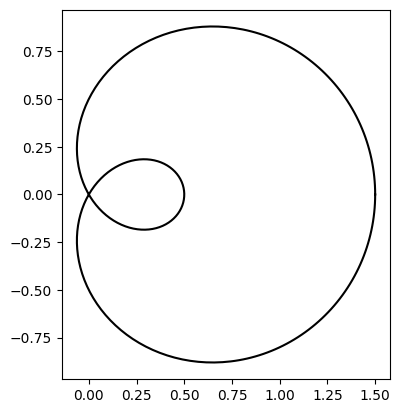

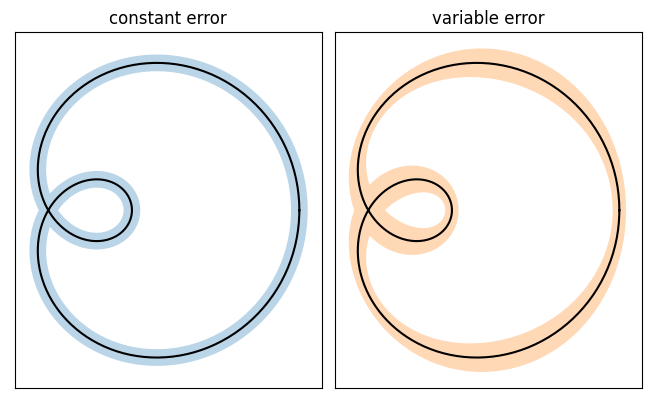

In [3]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

N = 400
t = np.linspace(0, 2 * np.pi, N)
r = 0.5 + np.cos(t)
x, y = r * np.cos(t), r * np.sin(t)

fig, ax = plt.subplots()
ax.plot(x, y, "k")
ax.set(aspect=1)

def draw_error_band(ax, x, y, err, **kwargs):
    # Calculate normals via centered finite differences (except the first point
    # which uses a forward difference and the last point which uses a backward
    # difference).
    dx = np.concatenate([[x[1] - x[0]], x[2:] - x[:-2], [x[-1] - x[-2]]])
    dy = np.concatenate([[y[1] - y[0]], y[2:] - y[:-2], [y[-1] - y[-2]]])
    l = np.hypot(dx, dy)
    nx = dy / l
    ny = -dx / l

    # end points of errors
    xp = x + nx * err
    yp = y + ny * err
    xn = x - nx * err
    yn = y - ny * err

    vertices = np.block([[xp, xn[::-1]],
                         [yp, yn[::-1]]]).T
    codes = np.full(len(vertices), Path.LINETO)
    codes[0] = codes[len(xp)] = Path.MOVETO
    path = Path(vertices, codes)
    ax.add_patch(PathPatch(path, **kwargs))


axs = (plt.figure(constrained_layout=True)
       .subplots(1, 2, sharex=True, sharey=True))
errs = [
    (axs[0], "constant error", 0.05),
    (axs[1], "variable error", 0.05 * np.sin(2 * t) ** 2 + 0.04),
]
for i, (ax, title, err) in enumerate(errs):
    ax.set(title=title, aspect=1, xticks=[], yticks=[])
    ax.plot(x, y, "k")
    draw_error_band(ax, x, y, err=err,
                    facecolor=f"C{i}", edgecolor="none", alpha=.3)

plt.show()

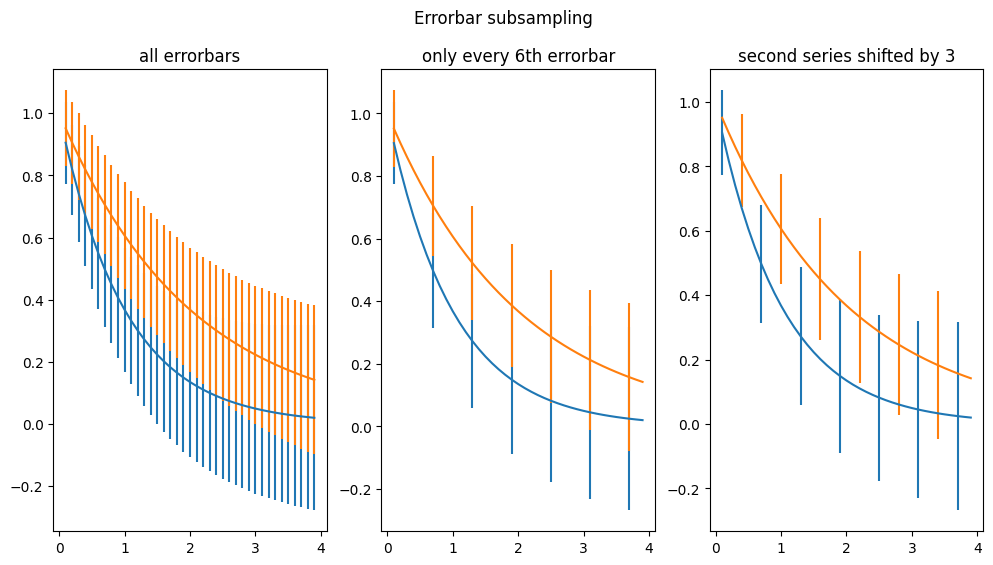

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.1)
y1 = np.exp(-1.0 * x)
y2 = np.exp(-0.5 * x)

# example variable error bar values
y1err = 0.1 + 0.1 * np.sqrt(x)
y2err = 0.1 + 0.1 * np.sqrt(x/2)


fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(12, 6))

ax0.set_title('all errorbars')
ax0.errorbar(x, y1, yerr=y1err)
ax0.errorbar(x, y2, yerr=y2err)

ax1.set_title('only every 6th errorbar')
ax1.errorbar(x, y1, yerr=y1err, errorevery=6)
ax1.errorbar(x, y2, yerr=y2err, errorevery=6)

ax2.set_title('second series shifted by 3')
ax2.errorbar(x, y1, yerr=y1err, errorevery=(0, 6))
ax2.errorbar(x, y2, yerr=y2err, errorevery=(3, 6))

fig.suptitle('Errorbar subsampling')
plt.show()

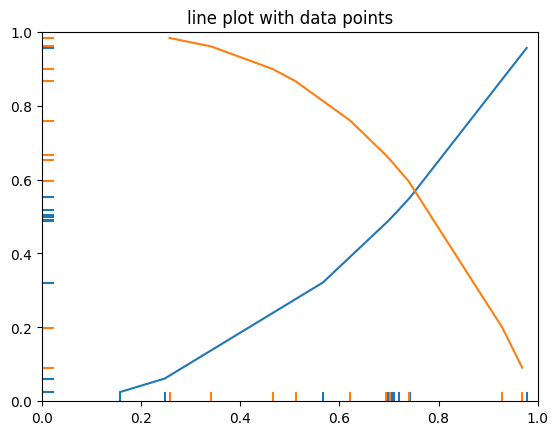

In [5]:
import matplotlib.pyplot as plt
from matplotlib.collections import EventCollection
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# create random data
xdata = np.random.random([2, 10])

# split the data into two parts
xdata1 = xdata[0, :]
xdata2 = xdata[1, :]

# sort the data so it makes clean curves
xdata1.sort()
xdata2.sort()

# create some y data points
ydata1 = xdata1 ** 2
ydata2 = 1 - xdata2 ** 3

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(xdata1, ydata1, color='tab:blue')
ax.plot(xdata2, ydata2, color='tab:orange')

# create the events marking the x data points
xevents1 = EventCollection(xdata1, color='tab:blue', linelength=0.05)
xevents2 = EventCollection(xdata2, color='tab:orange', linelength=0.05)

# create the events marking the y data points
yevents1 = EventCollection(ydata1, color='tab:blue', linelength=0.05,
                           orientation='vertical')
yevents2 = EventCollection(ydata2, color='tab:orange', linelength=0.05,
                           orientation='vertical')

# add the events to the axis
ax.add_collection(xevents1)
ax.add_collection(xevents2)
ax.add_collection(yevents1)
ax.add_collection(yevents2)

# set the limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

ax.set_title('line plot with data points')

# display the plot
plt.show()

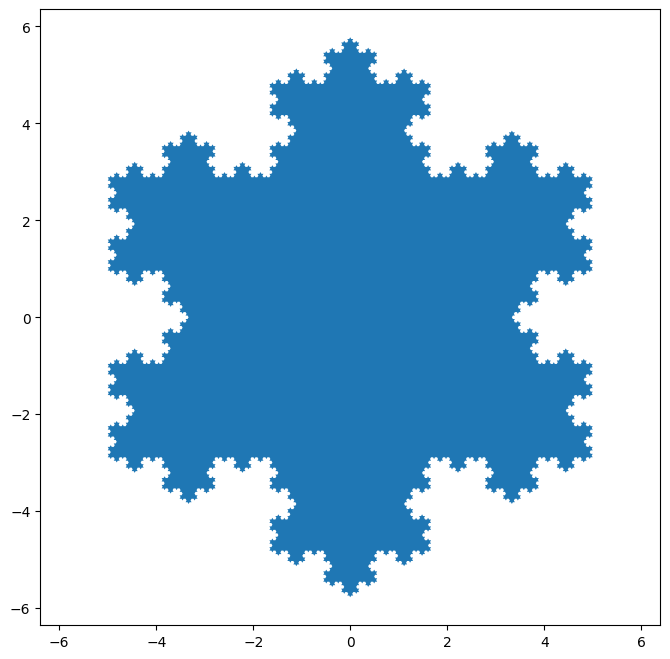

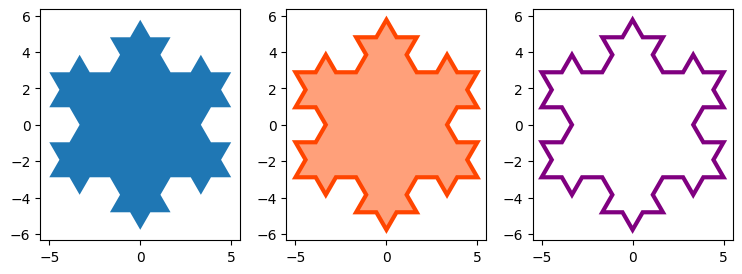

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

x, y = koch_snowflake(order=5)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()


x, y = koch_snowflake(order=2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3),
                                    subplot_kw={'aspect': 'equal'})
ax1.fill(x, y)
ax2.fill(x, y, facecolor='lightsalmon', edgecolor='orangered', linewidth=3)
ax3.fill(x, y, facecolor='none', edgecolor='purple', linewidth=3)

plt.show()

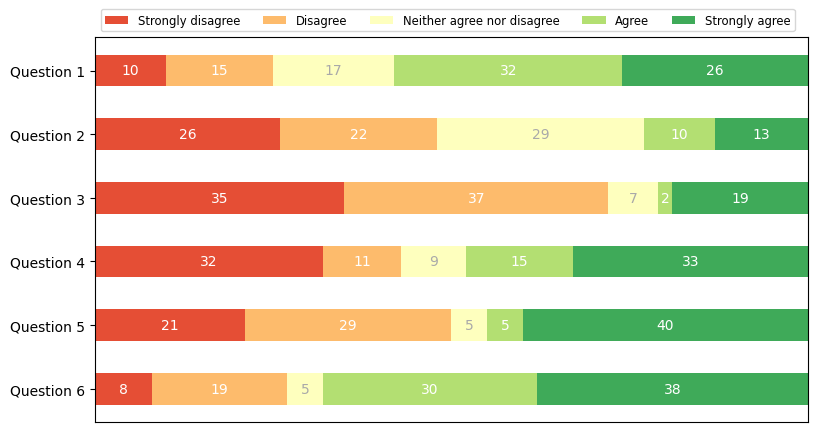

In [2]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

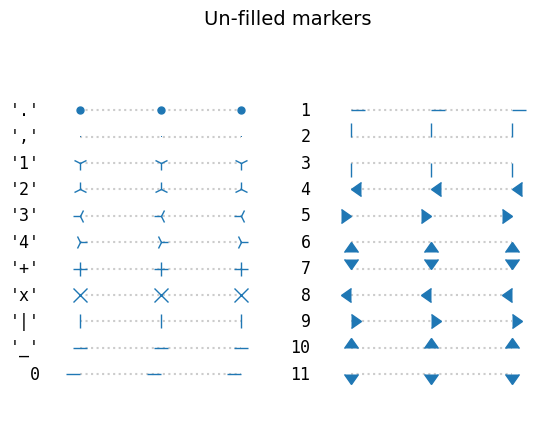

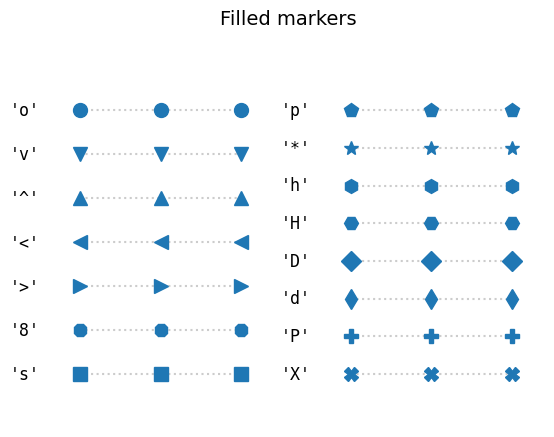

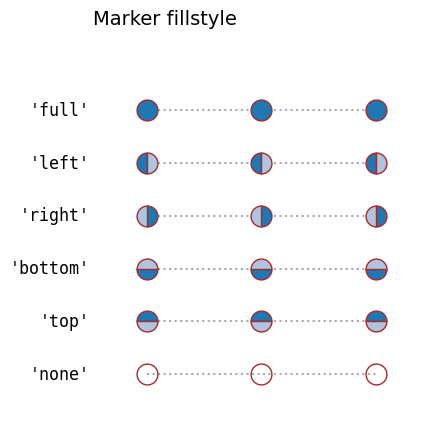

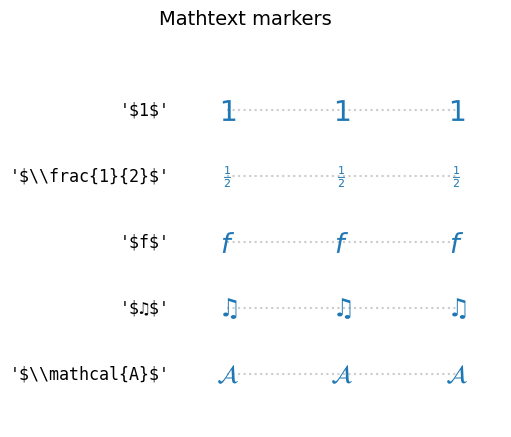

TypeError: MarkerStyle.__init__() takes from 1 to 3 positional arguments but 4 were given

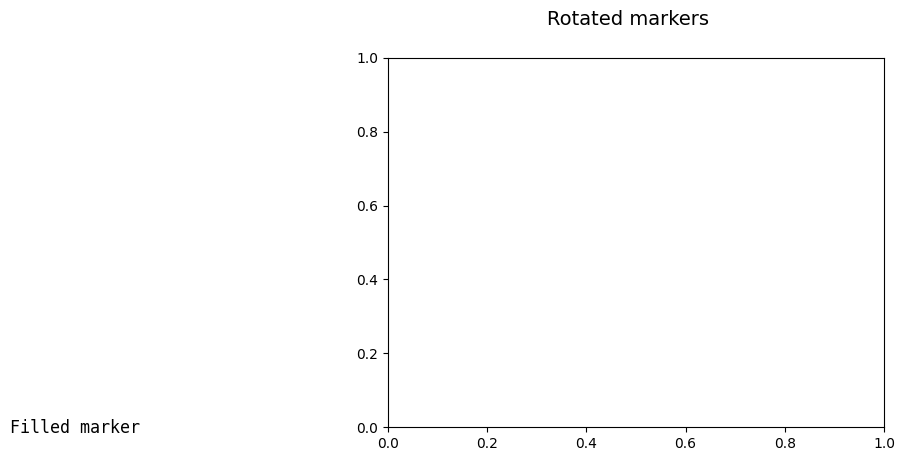

In [14]:
from matplotlib.markers import MarkerStyle
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.transforms import Affine2D


text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontfamily='monospace')
marker_style = dict(linestyle=':', color='0.8', markersize=10,
                    markerfacecolor="tab:blue", markeredgecolor="tab:blue")


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    ax.invert_yaxis()


def split_list(a_list):
    i_half = len(a_list) // 2
    return a_list[:i_half], a_list[i_half:]

fig, axs = plt.subplots(ncols=2)
fig.suptitle('Un-filled markers', fontsize=14)

# Filter out filled markers and marker settings that do nothing.
unfilled_markers = [m for m, func in Line2D.markers.items()
                    if func != 'nothing' and m not in Line2D.filled_markers]

for ax, markers in zip(axs, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker=marker, **marker_style)
    format_axes(ax)

plt.show()

fig, axs = plt.subplots(ncols=2)
fig.suptitle('Filled markers', fontsize=14)
for ax, markers in zip(axs, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker=marker, **marker_style)
    format_axes(ax)

plt.show()

fig, ax = plt.subplots()
fig.suptitle('Marker fillstyle', fontsize=14)
fig.subplots_adjust(left=0.4)

filled_marker_style = dict(marker='o', linestyle=':', markersize=15,
                           color='darkgrey',
                           markerfacecolor='tab:blue',
                           markerfacecoloralt='lightsteelblue',
                           markeredgecolor='brown')

for y, fill_style in enumerate(Line2D.fillStyles):
    ax.text(-0.5, y, repr(fill_style), **text_style)
    ax.plot([y] * 3, fillstyle=fill_style, **filled_marker_style)
format_axes(ax)

plt.show()

fig, ax = plt.subplots()
fig.suptitle('Mathtext markers', fontsize=14)
fig.subplots_adjust(left=0.4)

marker_style.update(markeredgecolor="none", markersize=15)
markers = ["$1$", r"$\frac{1}{2}$", "$f$", "$\u266B$", r"$\mathcal{A}$"]

for y, marker in enumerate(markers):
    # Escape dollars so that the text is written "as is", not as mathtext.
    ax.text(-0.5, y, repr(marker).replace("$", r"\$"), **text_style)
    ax.plot([y] * 3, marker=marker, **marker_style)
format_axes(ax)

plt.show()

common_style = {k: v for k, v in filled_marker_style.items() if k != 'marker'}
angles = [0, 10, 20, 30, 45, 60, 90]

fig, ax = plt.subplots()
fig.suptitle('Rotated markers', fontsize=14)

ax.text(-0.5, 0, 'Filled marker', **text_style)
for x, theta in enumerate(angles):
    t = Affine2D().rotate_deg(theta)
    ax.plot(x, 0, marker=MarkerStyle('o', 'left', t), **common_style)

ax.text(-0.5, 1, 'Un-filled marker', **text_style)
for x, theta in enumerate(angles):
    t = Affine2D().rotate_deg(theta)
    ax.plot(x, 1, marker=MarkerStyle('1', 'left', t), **common_style)

ax.text(-0.5, 2, 'Equation marker', **text_style)
for x, theta in enumerate(angles):
    t = Affine2D().rotate_deg(theta)
    eq = r'$\frac{1}{x}$'
    ax.plot(x, 2, marker=MarkerStyle(eq, 'left', t), **common_style)

for x, theta in enumerate(angles):
    ax.text(x, 2.5, f"{theta}°", horizontalalignment="center")
format_axes(ax)

fig.tight_layout()
plt.show()

from matplotlib.markers import JoinStyle, CapStyle

marker_inner = dict(markersize=35,
                    markerfacecolor='tab:blue',
                    markerfacecoloralt='lightsteelblue',
                    markeredgecolor='brown',
                    markeredgewidth=8,
                    )

marker_outer = dict(markersize=35,
                    markerfacecolor='tab:blue',
                    markerfacecoloralt='lightsteelblue',
                    markeredgecolor='white',
                    markeredgewidth=1,
                    )

fig, ax = plt.subplots()
fig.suptitle('Marker CapStyle', fontsize=14)
fig.subplots_adjust(left=0.1)

for y, cap_style in enumerate(CapStyle):
    ax.text(-0.5, y, cap_style.name, **text_style)
    for x, theta in enumerate(angles):
        t = Affine2D().rotate_deg(theta)
        m = MarkerStyle('1', transform=t, capstyle=cap_style)
        ax.plot(x, y, marker=m, **marker_inner)
        ax.plot(x, y, marker=m, **marker_outer)
        ax.text(x, len(CapStyle) - .5, f'{theta}°', ha='center')
format_axes(ax)
plt.show()


fig, ax = plt.subplots()
fig.suptitle('Marker JoinStyle', fontsize=14)
fig.subplots_adjust(left=0.05)

for y, join_style in enumerate(JoinStyle):
    ax.text(-0.5, y, join_style.name, **text_style)
    for x, theta in enumerate(angles):
        t = Affine2D().rotate_deg(theta)
        m = MarkerStyle('*', transform=t, joinstyle=join_style)
        ax.plot(x, y, marker=m, **marker_inner)
        ax.text(x, len(JoinStyle) - .5, f'{theta}°', ha='center')
format_axes(ax)

plt.show()

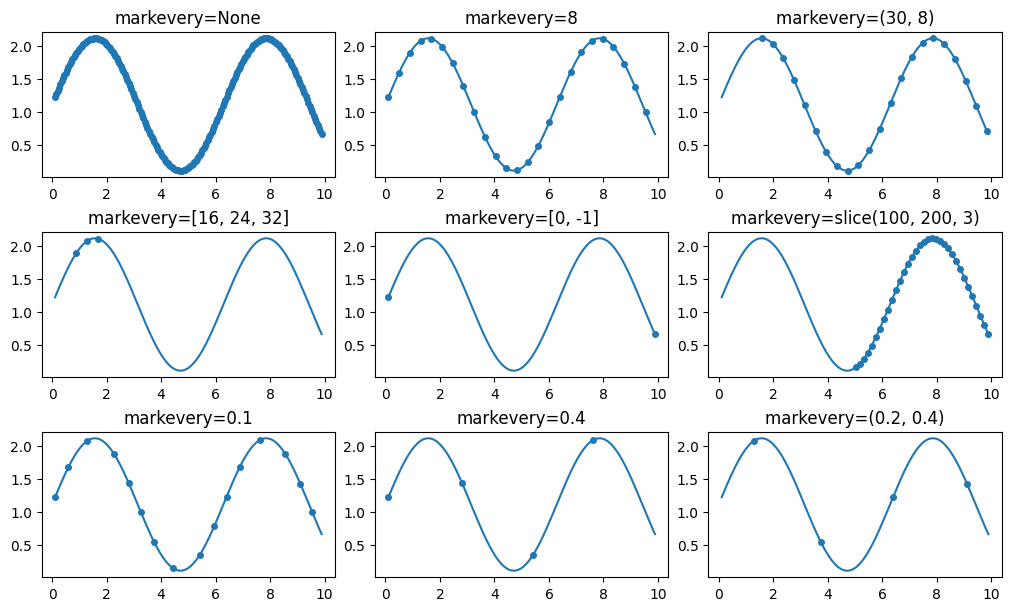

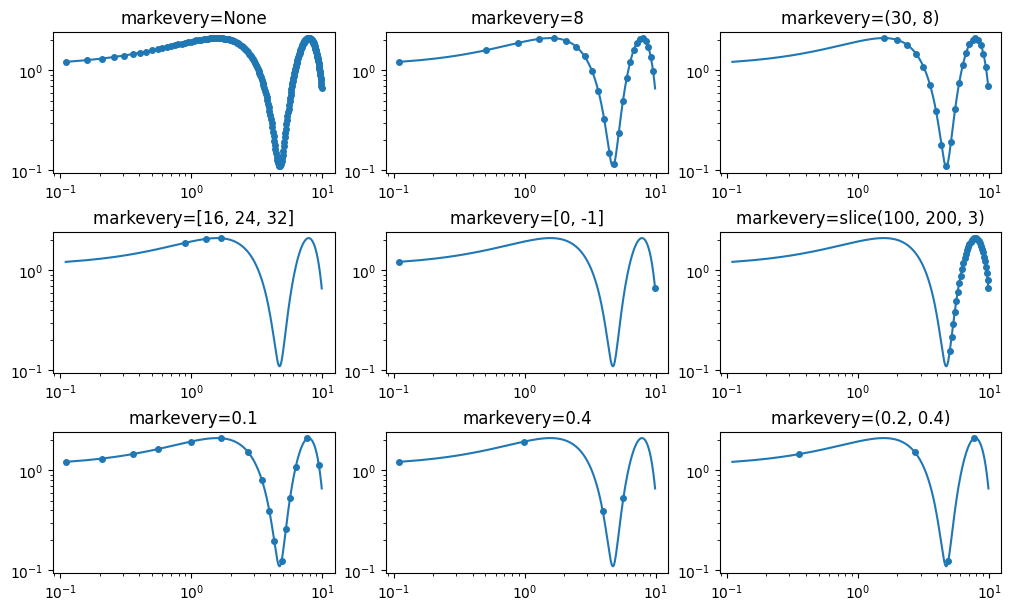

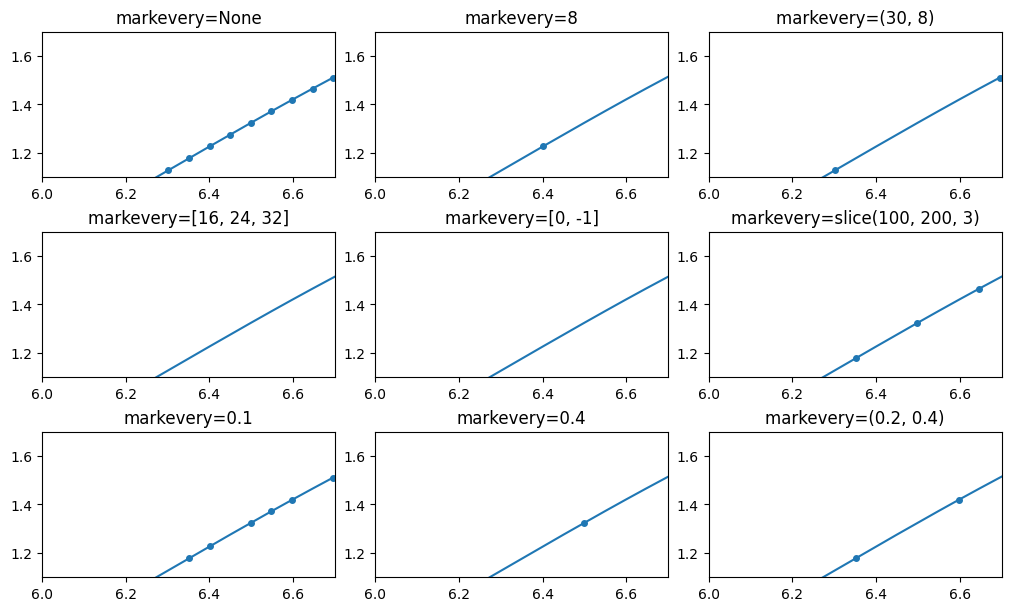

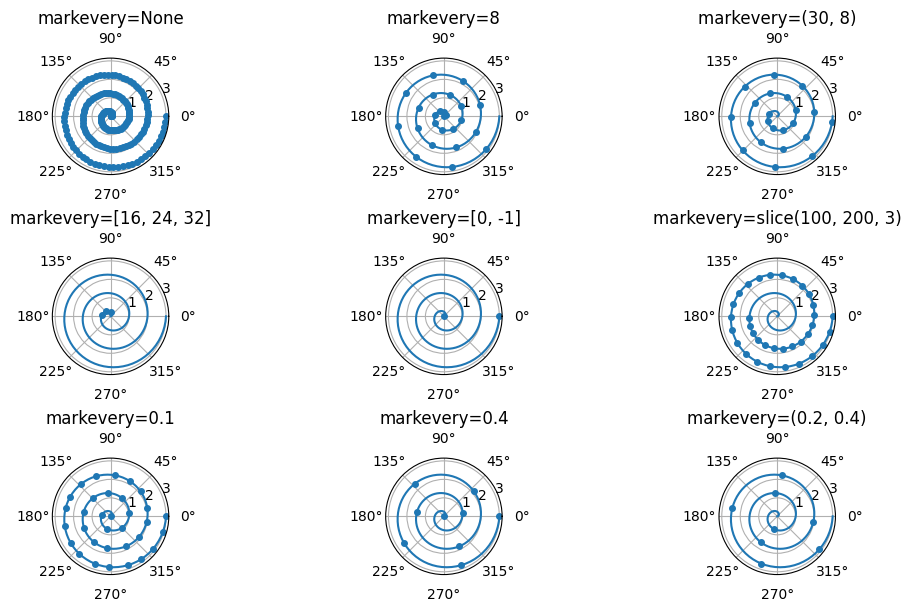

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# define a list of markevery cases to plot
cases = [
    None,
    8,
    (30, 8),
    [16, 24, 32],
    [0, -1],
    slice(100, 200, 3),
    0.1,
    0.4,
    (0.2, 0.4)
]

# data points
delta = 0.11
x = np.linspace(0, 10 - 2 * delta, 200) + delta
y = np.sin(x) + 1.0 + delta

fig, axs = plt.subplots(3, 3, figsize=(10, 6), constrained_layout=True)
for ax, markevery in zip(axs.flat, cases):
    ax.set_title(f'markevery={markevery}')
    ax.plot(x, y, 'o', ls='-', ms=4, markevery=markevery)

fig, axs = plt.subplots(3, 3, figsize=(10, 6), constrained_layout=True)
for ax, markevery in zip(axs.flat, cases):
    ax.set_title(f'markevery={markevery}')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, y, 'o', ls='-', ms=4, markevery=markevery)

fig, axs = plt.subplots(3, 3, figsize=(10, 6), constrained_layout=True)
for ax, markevery in zip(axs.flat, cases):
    ax.set_title(f'markevery={markevery}')
    ax.plot(x, y, 'o', ls='-', ms=4, markevery=markevery)
    ax.set_xlim((6, 6.7))
    ax.set_ylim((1.1, 1.7))

r = np.linspace(0, 3.0, 200)
theta = 2 * np.pi * r

fig, axs = plt.subplots(3, 3, figsize=(10, 6), constrained_layout=True,
                        subplot_kw={'projection': 'polar'})
for ax, markevery in zip(axs.flat, cases):
    ax.set_title(f'markevery={markevery}')
    ax.plot(theta, r, 'o', ls='-', ms=4, markevery=markevery)

plt.show()

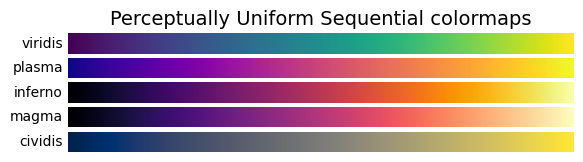

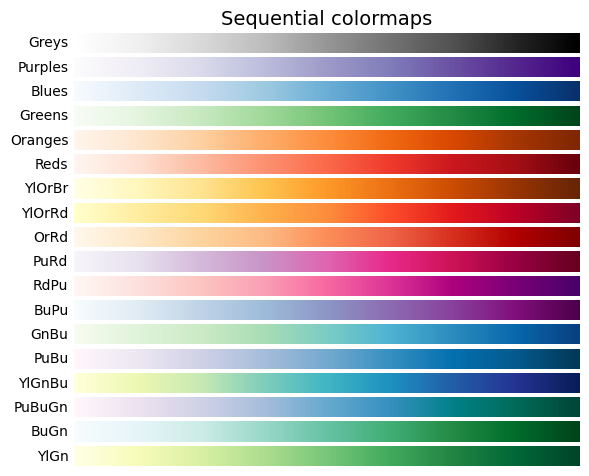

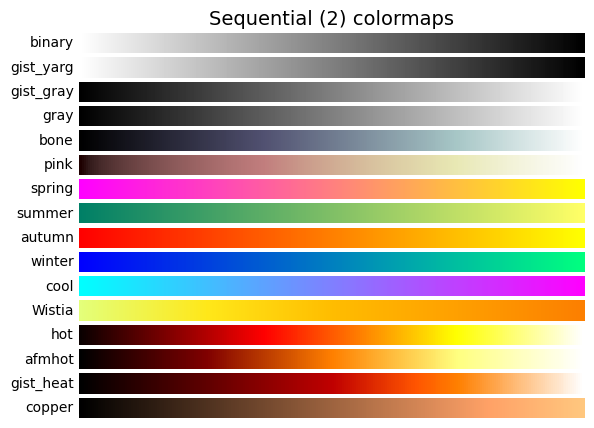

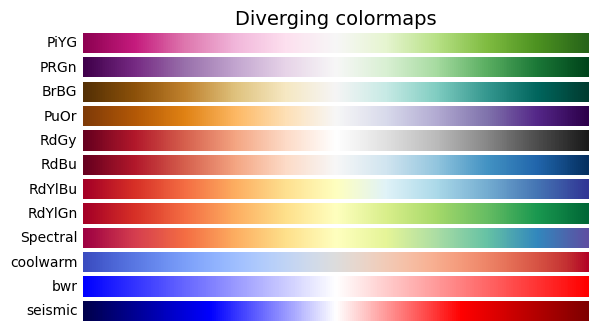

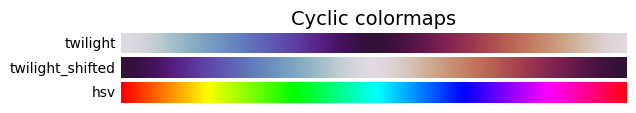

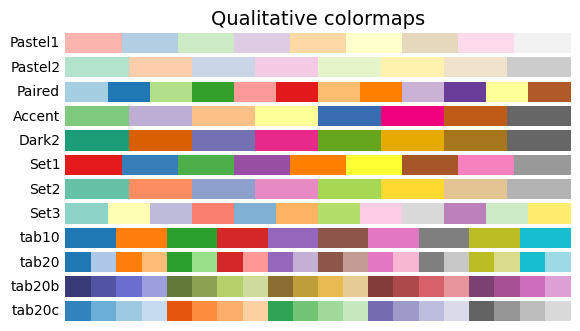

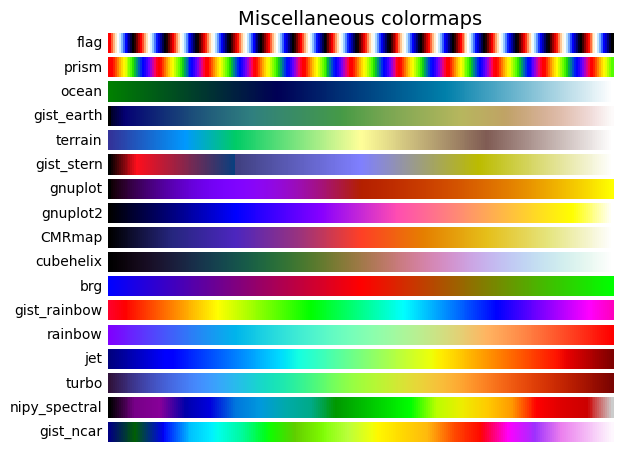

In [17]:
import numpy as np
import matplotlib.pyplot as plt


cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar'])]


gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axs = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

    axs[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, cmap_name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=cmap_name)
        ax.text(-.01, .5, cmap_name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

plt.show()